**Part a**

In [1]:
#Installing yahoo finance
!pip install -q yfinance

In [2]:
import yfinance as yf
data = yf.download("BTC-USD", start="2019-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


**Part b**

In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


**Part c**

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(data['Open'], test_size=0.2, shuffle=False)

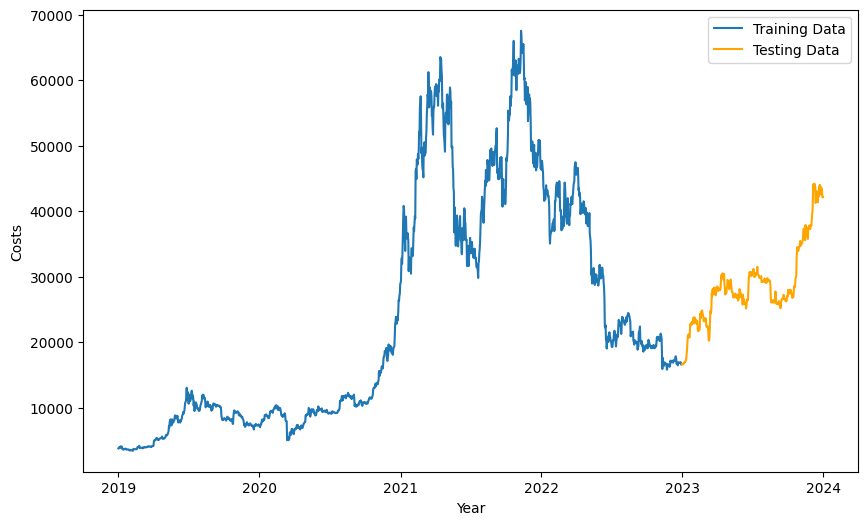

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train.values, label='Training Data')  # Blue line
plt.plot(test.index, test.values, label='Testing Data', color='orange')  # Orange line

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Costs')

# Display legend to differentiate between training and testing data
plt.legend()

# Show the plot
plt.show()


**Part d**

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

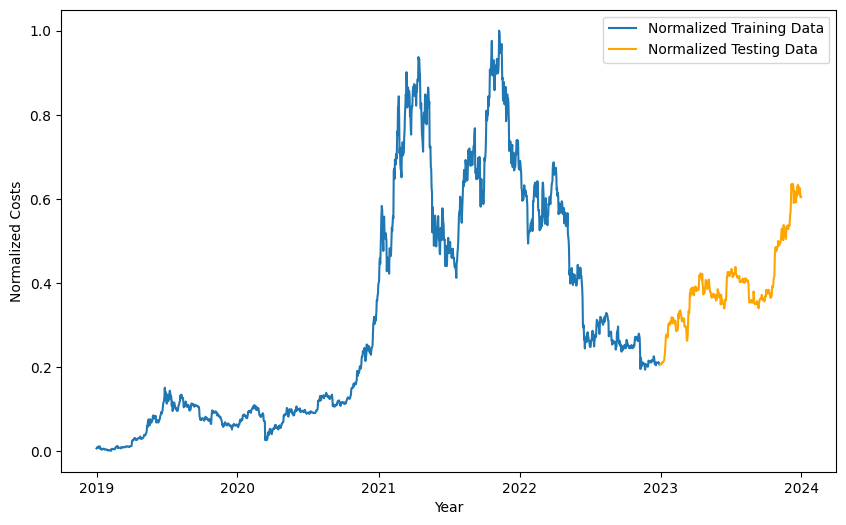

In [13]:
# Plotting the normalized training data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train_scaled, label='Normalized Training Data')  # Blue line
plt.plot(test.index, test_scaled, label='Normalized Testing Data', color='orange')  # Orange line

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Normalized Costs')

# Display legend to differentiate between training and testing data
plt.legend()

# Show the plot
plt.show()

**Part e**

In [14]:
import numpy as np

In [15]:
# Define the sequence length (number of past data points to consider)
sequence_length = 60

In [16]:
# Create input sequences (X_train) and output values (y_train)
X_train, y_train = [], []

In [17]:
# Iterate through the training data
for i in range(len(train_scaled) - sequence_length):
    X_train.append(train_scaled[i:i+sequence_length])
    y_train.append(train_scaled[i+sequence_length])

# Convert lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
# Print the shapes
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (1400, 60, 1)
y_train.shape: (1400, 1)
